In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'Recent_sheet(1).csv'  # Update with the correct file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Handle missing values by filling with the median (for numerical columns) or mode (for categorical columns)
imputer = SimpleImputer(strategy='median')  # Change strategy if needed
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Re-check the dataset after imputation
print("Missing values after imputation:")
print(data_imputed.isnull().sum())

# Assuming 'CPK obs' is the target variable and the rest are features
if 'CPK obs' not in data_imputed.columns:
    raise ValueError("'CPK obs' column is missing in the dataset")

X = data_imputed.drop('CPK obs', axis=1)
y = data_imputed['CPK obs']

# If the target variable is continuous, categorize it into classes
if y.dtype == 'float64' or y.dtype == 'int64':
    # Example of binning into classes (modify bins as needed)
    bins = [0, 1, 2, 3, 4, 5]
    labels = [0, 1, 2, 3, 4]
    y = pd.cut(y, bins=bins, labels=labels)

# Convert categorical features to numerical if any
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


    L/W      H/P  Wi/Wo  P/Wu  CPK obs
0  5.99  0.19145    1.0  1.25  2.58308
1  5.99  0.25539    1.0  1.25  2.16007
2  5.99  0.32096    1.0  1.25  1.88651
3  5.99  0.37618    1.0  1.25  1.70894
4  5.99  0.43613    1.0  1.25  1.60542
Missing values in each column:
L/W        0
H/P        0
Wi/Wo      0
P/Wu       0
CPK obs    0
dtype: int64
Missing values after imputation:
L/W        0
H/P        0
Wi/Wo      0
P/Wu       0
CPK obs    0
dtype: int64
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        95
           2       1.00      0.75      0.86        24

    accuracy                           0.95       119
   macro avg       0.97      0.88      0.91       119
weighted avg       0.95      0.95      0.95       119



  Feature  Importance
1     H/P    0.768672
0     L/W    0.109695
3    P/Wu    0.066466
2   Wi/Wo    0.055167


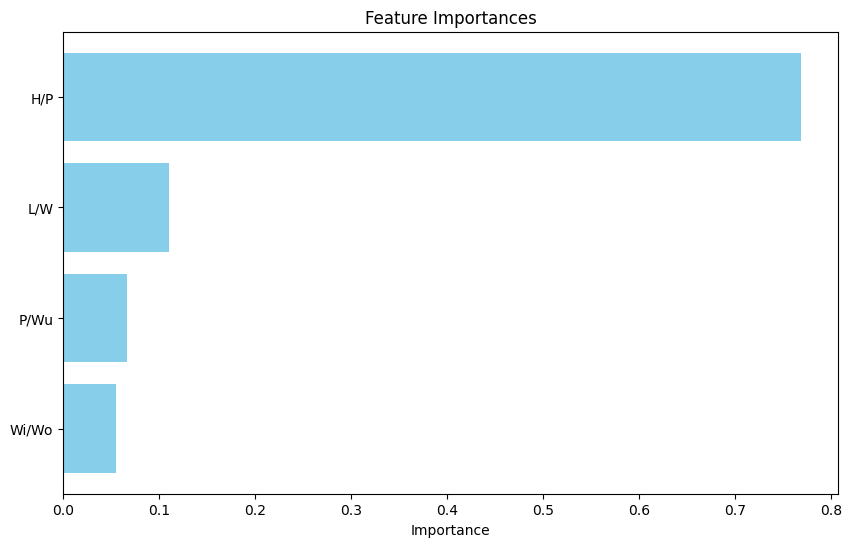

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
importances = classifier.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [4]:
# Identify the top features based on importance
important_features = ['H/P']  # List features with the highest importance scores

# Create a new DataFrame with only the important features
X_important = X[important_features]

# Split the data into training and testing sets using only the important features
X_train_important, X_test_important, y_train, y_test = train_test_split(X_important, y, test_size=0.3, random_state=42)

# Standardize the important features
X_train_important_scaled = scaler.fit_transform(X_train_important)
X_test_important_scaled = scaler.transform(X_test_important)

# Initialize and train the classifier with the important features
classifier.fit(X_train_important_scaled, y_train)

# Make predictions
y_pred_important = classifier.predict(X_test_important_scaled)

# Evaluate the model
accuracy_important = accuracy_score(y_test, y_pred_important)
print(f'Accuracy with important features: {accuracy_important:.2f}')
print('Classification Report with important features:')
print(classification_report(y_test, y_pred_important))


Accuracy with important features: 0.88
Classification Report with important features:
              precision    recall  f1-score   support

           1       0.90      0.96      0.93        95
           2       0.78      0.58      0.67        24

    accuracy                           0.88       119
   macro avg       0.84      0.77      0.80       119
weighted avg       0.88      0.88      0.88       119



In [5]:
# List of top features to try
top_features = ['H/P', 'L/W']  # You can adjust based on your importance scores

# Create a new DataFrame with only the top features
X_top_features = X[top_features]

# Split the data into training and testing sets using the top features
X_train_top_features, X_test_top_features, y_train, y_test = train_test_split(X_top_features, y, test_size=0.3, random_state=42)

# Standardize the top features
X_train_top_features_scaled = scaler.fit_transform(X_train_top_features)
X_test_top_features_scaled = scaler.transform(X_test_top_features)

# Initialize and train the classifier with the top features
classifier.fit(X_train_top_features_scaled, y_train)

# Make predictions
y_pred_top_features = classifier.predict(X_test_top_features_scaled)

# Evaluate the model
accuracy_top_features = accuracy_score(y_test, y_pred_top_features)
print(f'Accuracy with top features: {accuracy_top_features:.2f}')
print('Classification Report with top features:')
print(classification_report(y_test, y_pred_top_features))


Accuracy with top features: 0.97
Classification Report with top features:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98        95
           2       0.95      0.88      0.91        24

    accuracy                           0.97       119
   macro avg       0.96      0.93      0.95       119
weighted avg       0.97      0.97      0.97       119



In [8]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize StratifiedKFold
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with stratified folds
scores = cross_val_score(classifier, X_train_scaled, y_train, cv=stratified_kf, scoring='accuracy')

# Print cross-validation results
print(f'Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}')


/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy: 0.96 ± 0.02


In [9]:
from sklearn.metrics import make_scorer, classification_report
from sklearn.model_selection import cross_val_predict

# Get cross-validated predictions
predictions = cross_val_predict(classifier, X_train_scaled, y_train, cv=stratified_kf)

# Print classification report
print(classification_report(y_train, predictions))


/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.97      0.98      0.97       216
           2       0.91      0.89      0.90        56

    accuracy                           0.96       276
   macro avg       0.96      0.87      0.91       276
weighted avg       0.96      0.96      0.96       276



In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your dataset
data = pd.read_csv('Recent_sheet(1).csv')

# Define features and target variable
features = ['L/W', 'H/P', 'Wi/Wo', 'P/Wu']
target = 'CPK obs'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Get the model coefficients
coefficients = model.coef_
intercept = model.intercept_

print(f"Model coefficients: {coefficients}")
print(f"Model intercept: {intercept}")

# Construct the equation
equation = f"CPK = {intercept:.4f} + " + " + ".join([f"{coeff:.4f}*{feature}" for coeff, feature in zip(coefficients, features)])
print(f"Equation: {equation}")


Mean Squared Error: 0.02593175198863753
Model coefficients: [ 0.21499275 -1.45068116  0.39832379 -0.37092645]
Model intercept: 1.0925119341801939
Equation: CPK = 1.0925 + 0.2150*L/W + -1.4507*H/P + 0.3983*Wi/Wo + -0.3709*P/Wu


In [12]:
def predict_cpk(LW, HP, WiWo, PWu):
    # Model parameters
    intercept = 1.0925
    coef_LW = 0.2150
    coef_HP = -1.4507
    coef_WiWo = 0.3983
    coef_PWu = -0.3709

    # Calculate predicted CPK
    cpk = (intercept +
           coef_LW * LW +
           coef_HP * HP +
           coef_WiWo * WiWo +
           coef_PWu * PWu)
    
    return cpk

# Example usage
LW = 2.0  # L/W
HP = 1.5  # H/P
WiWo = 0.8  # Wi/Wo
PWu = 0.9  # P/Wu

predicted_cpk = predict_cpk(LW, HP, WiWo, PWu)
print(f"Predicted CPK: {predicted_cpk}")


Predicted CPK: -0.66872


In [14]:
import pandas as pd

# Define the prediction function
def predict_cpk(LW, HP, WiWo, PWu):
    # Model parameters
    intercept = 1.0925
    coef_LW = 0.2150
    coef_HP = -1.4507
    coef_WiWo = 0.3983
    coef_PWu = -0.3709

    # Calculate predicted CPK
    cpk = (intercept +
           coef_LW * LW +
           coef_HP * HP +
           coef_WiWo * WiWo +
           coef_PWu * PWu)
    
    return cpk

# Load your dataset
df = pd.read_csv('Recent_sheet(1).csv')

# Calculate the predicted CPK for each row
df['Predicted_CPK'] = df.apply(
    lambda row: predict_cpk(row['L/W'], row['H/P'], row['Wi/Wo'], row['P/Wu']), axis=1
)

# Save the results to a new CSV file
df.to_csv('Predicted_CPK_Results.csv', index=False)

print("Predicted CPK values have been calculated and saved to 'Predicted_CPK_Results.csv'.")


Predicted CPK values have been calculated and saved to 'Predicted_CPK_Results.csv'.


Mean Squared Error: 0.02804565008409688
Mean Absolute Error: 0.1275634562995202


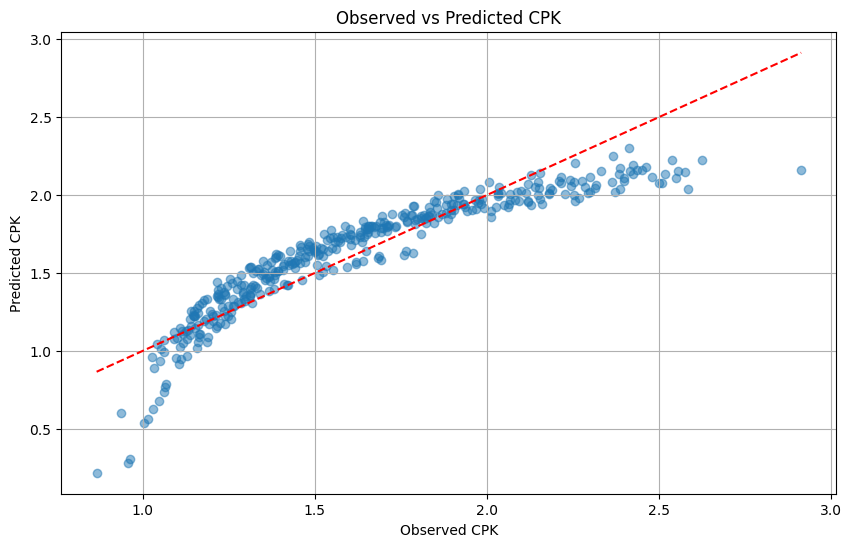

Comparison results have been calculated and saved to 'CPK_Comparison_Results.csv'.


In [17]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define the prediction function
def predict_cpk(LW, HP, WiWo, PWu):
    # Model parameters
    intercept = 1.0925
    coef_LW = 0.2150
    coef_HP = -1.4507
    coef_WiWo = 0.3983
    coef_PWu = -0.3709

    # Calculate predicted CPK
    cpk = (intercept +
           coef_LW * LW +
           coef_HP * HP +
           coef_WiWo * WiWo +
           coef_PWu * PWu)
    
    return cpk

# Load your dataset
df = pd.read_csv('Recent_sheet(1).csv')

# Calculate the predicted CPK for each row
df['Predicted_CPK'] = df.apply(
    lambda row: predict_cpk(row['L/W'], row['H/P'], row['Wi/Wo'], row['P/Wu']), axis=1
)

# Calculate comparison metrics
observed_cpk = df['CPK obs']  # Assuming 'CPK' is the name of the column with observed values
predicted_cpk = df['Predicted_CPK']

mse = mean_squared_error(observed_cpk, predicted_cpk)
mae = mean_absolute_error(observed_cpk, predicted_cpk)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Create a scatter plot for visual comparison
plt.figure(figsize=(10, 6))
plt.scatter(observed_cpk, predicted_cpk, alpha=0.5)
plt.plot([min(observed_cpk), max(observed_cpk)], [min(observed_cpk), max(observed_cpk)], color='red', linestyle='--')
plt.xlabel('Observed CPK')
plt.ylabel('Predicted CPK')
plt.title('Observed vs Predicted CPK')
plt.grid(True)
plt.show()

# Save the results to a new CSV file
df.to_csv('CPK_Comparison_Results.csv', index=False)

print("Comparison results have been calculated and saved to 'CPK_Comparison_Results.csv'.")


Mean Squared Error: 0.022018732618870007
Mean Absolute Error: 0.11240113959343738


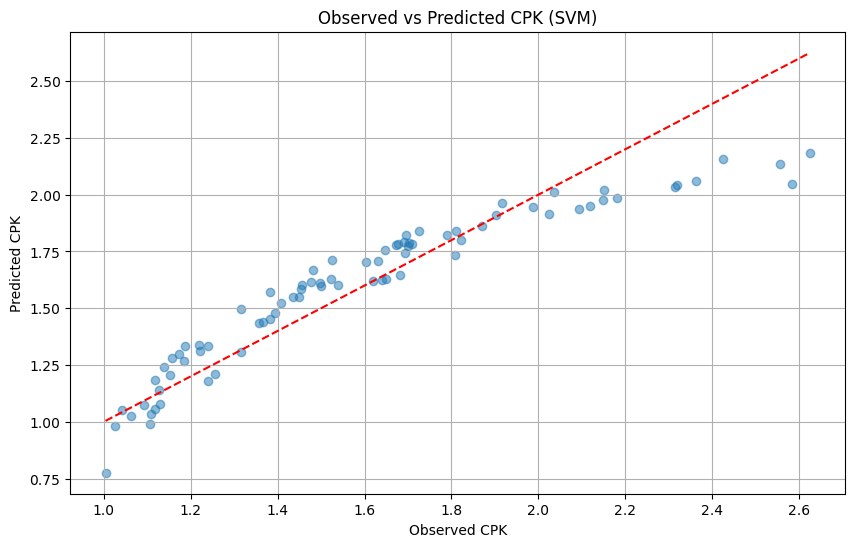

Comparison results have been calculated and saved to 'SVM_CPK_Comparison_Results.csv'.


In [20]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Recent_sheet(1).csv')

# Prepare feature matrix (X) and target vector (y)
# Assuming your dataset columns are named as follows:
X = df[['L/W', 'H/P', 'Wi/Wo', 'P/Wu']]
y = df['CPK obs']

# Split the data into training and test sets (optional, but recommended)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Non-Linear SVM model with RBF kernel
svm_model = SVR(kernel='rbf', C=1.0, gamma='scale')  # You can adjust parameters as needed
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate comparison metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Create a scatter plot for visual comparison
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Observed CPK')
plt.ylabel('Predicted CPK')
plt.title('Observed vs Predicted CPK (SVM)')
plt.grid(True)
plt.show()

# If you want to save predictions to CSV
df_test = X_test.copy()
df_test['Observed_CPK'] = y_test
df_test['Predicted_CPK'] = y_pred
df_test.to_csv('SVM_CPK_Comparison_Results.csv', index=False)

print("Comparison results have been calculated and saved to 'SVM_CPK_Comparison_Results.csv'.")


Mean Squared Error: 0.022018732618870007
Mean Absolute Error: 0.11240113959343738


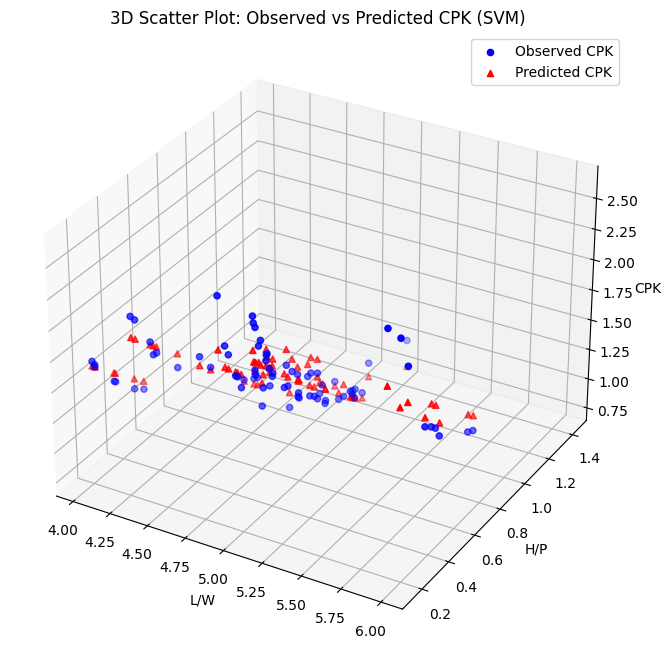

Comparison results have been calculated and saved to 'SVM_CPK_Comparison_Results.csv'.


In [21]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('Recent_sheet(1).csv')

# Prepare feature matrix (X) and target vector (y)
X = df[['L/W', 'H/P', 'Wi/Wo', 'P/Wu']]
y = df['CPK obs']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Non-Linear SVM model with RBF kernel
svm_model = SVR(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate comparison metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Create a 3D scatter plot for visual comparison
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(X_test['L/W'], X_test['H/P'], y_test, c='b', marker='o', label='Observed CPK')
sc_pred = ax.scatter(X_test['L/W'], X_test['H/P'], y_pred, c='r', marker='^', label='Predicted CPK')

# Labels and Title
ax.set_xlabel('L/W')
ax.set_ylabel('H/P')
ax.set_zlabel('CPK')
ax.set_title('3D Scatter Plot: Observed vs Predicted CPK (SVM)')

# Add a legend
plt.legend(loc='best')

# Show plot
plt.show()

# Save results to CSV
df_test = X_test.copy()
df_test['Observed_CPK'] = y_test
df_test['Predicted_CPK'] = y_pred
df_test.to_csv('SVM_CPK_Comparison_Results.csv', index=False)

print("Comparison results have been calculated and saved to 'SVM_CPK_Comparison_Results.csv'.")


Mean Squared Error: 0.022018732618870007
Mean Absolute Error: 0.11240113959343738


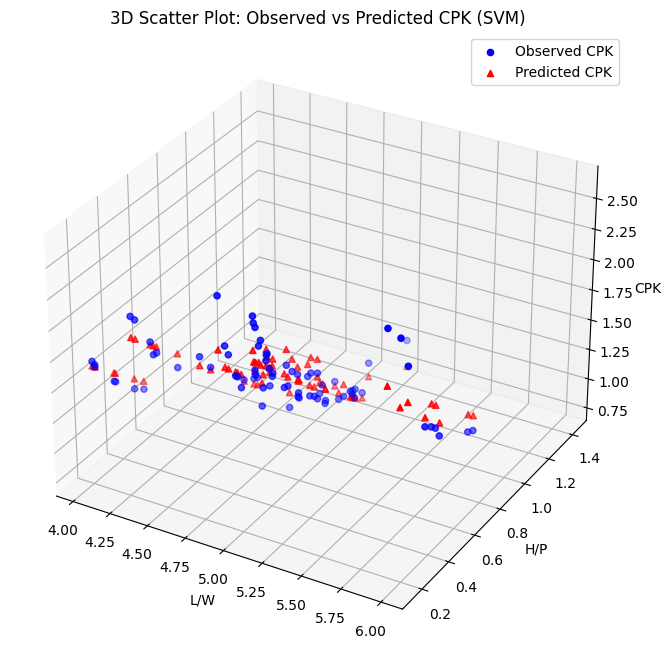

Comparison results have been calculated and saved to 'SVM_CPK_Comparison_Results.csv'.


In [22]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('Recent_sheet(1).csv')

# Prepare feature matrix (X) and target vector (y)
X = df[['L/W', 'H/P', 'Wi/Wo', 'P/Wu']]
y = df['CPK obs']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Non-Linear SVM model with RBF kernel
svm_model = SVR(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate comparison metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Create a 3D scatter plot for visual comparison
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for observed CPK
ax.scatter(X_test['L/W'], X_test['H/P'], y_test, c='b', marker='o', label='Observed CPK')

# Scatter plot for predicted CPK
ax.scatter(X_test['L/W'], X_test['H/P'], y_pred, c='r', marker='^', label='Predicted CPK')

# Labels and Title
ax.set_xlabel('L/W')
ax.set_ylabel('H/P')
ax.set_zlabel('CPK')
ax.set_title('3D Scatter Plot: Observed vs Predicted CPK (SVM)')

# Add a legend
ax.legend(loc='best')

# Show plot
plt.show()

# Save results to CSV
df_test = X_test.copy()
df_test['Observed_CPK'] = y_test
df_test['Predicted_CPK'] = y_pred
df_test.to_csv('SVM_CPK_Comparison_Results.csv', index=False)

print("Comparison results have been calculated and saved to 'SVM_CPK_Comparison_Results.csv'.")
